In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# %matplotlib inline
# sns.set()

In [31]:
df = pd.read_csv('processed_l55_cubic.csv')
df.head()

,depth,porosity,gr_density,w_saturation,o_saturation,k
0,2344.0,0.194,2680,0.398667,0.209000,132.00
1,2344.3,0.161,2710,0.537333,0.208182,4.48
2,2344.5,0.105,2710,0.676000,0.207364,0.06
3,2344.8,0.214,2670,0.284000,0.206545,63.40
4,2345.1,0.105,2710,0.676000,0.205727,0.06


In [32]:
# selecting features and label
X = df.iloc[:, :-1]  # features
y = df.iloc[:,-1]  # label
X.shape, y.shape

((197, 5), (197,))

In [4]:
df.columns

Index(['depth', 'porosity', 'gr_density', 'w_saturation', 'o_saturation', 'k'], dtype='object')

In [29]:
df.head()

,Depth,$\phi$,$\rho_{gr}$,$S_w$,$S_o$,K
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
# spliting into training and testing set for both X and y
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=33)


In [42]:
# function to convert seconds to into hours, minutes and seconds
# this function is used to measure the time taking by the models
def convert(seconds):
    seconds = seconds % (24 * 3600)
    hour = seconds // 3600
    seconds %= 3600
    minutes = seconds // 60
    seconds %= 60
    return "%d:%02d:%02d" % (hour, minutes, seconds)

In [43]:
# Loading the svr model from svm and GridSearchCV from model_selection
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
import time

regr = GridSearchCV(
    GradientBoostingRegressor(), 
    {
        'loss' : ['squared_error'],
        'learning_rate': [0.1,0.08],
        'n_estimators':[100,200,300],
        'criterion': ['squared_error','friedman_mse'],
        'max_depth': [3,4,5,6,None],
        'min_samples_split': [2],
        'min_weight_fraction_leaf': [0],
        'max_leaf_nodes': [7],
    }, 
    cv=5, 
    scoring=['neg_mean_squared_error', 'r2'], 
    refit='r2',
    verbose=2)

start = time.time()
# enter your code below this line to calculate time it take

#Fit the model
regr.fit(X_train, y_train)

# enter you code above this line  to calculate time it take   
end = time.time()

print('run_time:', convert(end-start), 'h:m:s')

#regr.cv_results_


Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] END criterion=squared_error, learning_rate=0.1, loss=squared_error, max_depth=3, max_leaf_nodes=7, min_samples_split=2, min_weight_fraction_leaf=0, n_estimators=100; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.1, loss=squared_error, max_depth=3, max_leaf_nodes=7, min_samples_split=2, min_weight_fraction_leaf=0, n_estimators=100; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.1, loss=squared_error, max_depth=3, max_leaf_nodes=7, min_samples_split=2, min_weight_fraction_leaf=0, n_estimators=100; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.1, loss=squared_error, max_depth=3, max_leaf_nodes=7, min_samples_split=2, min_weight_fraction_leaf=0, n_estimators=100; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.1, loss=squared_error, max_depth=3, max_leaf_nodes=7, min_samples_split=2, min_weight_fraction_leaf=0, n_estimators=100; total t

In [44]:
# converting the results to a readable format using dataFrame
df = pd.DataFrame(regr.cv_results_)

# getting all parameter combinations and their performance result
result = df[['param_n_estimators', 'param_learning_rate', 'param_loss', 'param_min_weight_fraction_leaf',
            'param_criterion', 'param_max_depth', 'param_min_samples_split', 'param_max_leaf_nodes',
             'mean_test_r2', 'mean_test_neg_mean_squared_error']]
result.to_csv('./output/gradient_boosting/performance_result_for_gradient_boosting_gridsearchCV.csv')
result

,param_n_estimators,param_learning_rate,param_loss,param_min_weight_fraction_leaf,param_criterion,param_max_depth,param_min_samples_split,param_max_leaf_nodes,mean_test_r2,mean_test_neg_mean_squared_error
0,100,0.10,squared_error,0,squared_error,3,2,7,0.791619,-2763.859015
1,200,0.10,squared_error,0,squared_error,3,2,7,0.791977,-2849.949607
2,300,0.10,squared_error,0,squared_error,3,2,7,0.785067,-2857.101368
3,100,0.10,squared_error,0,squared_error,4,2,7,0.793598,-2547.524008
4,200,0.10,squared_error,0,squared_error,4,2,7,0.779975,-2705.530426
5,300,0.10,squared_error,0,squared_error,4,2,7,0.773375,-2763.347294
6,100,0.10,squared_error,0,squared_error,5,2,7,0.790215,-2587.499982
7,200,0.10,squared_error,0,squared_error,5,2,7,0.784418,-2693.952888
8,300,0.10,squared_error,0,squared_error,5,2,7,0.787209,-2610.235621
9,100,0.10,squared_error,0,squared_error,6,2,7,0.785885,-2626.916309


In [45]:
# printing the best combination of parameter that perform the best
print(regr.best_params_)

# the best performing score
print(regr.best_score_)

{'criterion': 'friedman_mse', 'learning_rate': 0.1, 'loss': 'squared_error', 'max_depth': 6, 'max_leaf_nodes': 7, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0, 'n_estimators': 100}
0.7958101716104261


In [46]:
import time
from sklearn.ensemble import GradientBoostingRegressor

regressor = GradientBoostingRegressor(n_estimators=regr.best_params_['n_estimators'],
                            learning_rate=regr.best_params_['learning_rate'],
                            loss=regr.best_params_['loss'],
                            max_depth=regr.best_params_['max_depth'],
                            criterion=regr.best_params_['criterion'],
                            min_samples_split=regr.best_params_['min_samples_split'],
                            min_weight_fraction_leaf=regr.best_params_['min_weight_fraction_leaf'],
                            max_leaf_nodes=regr.best_params_['max_leaf_nodes'],
                            verbose=1)

start = time.time() # starting of the time
regressor.fit(X_train, y_train) # fit/train the model

end = time.time() # ending of the time
print('run_time:', convert(end - start), 'h:m:s')

pred_1 = regressor.predict(X_train) # prediction for training set
pred_2 = regressor.predict(X_test) # prediction for testing set
pred_3 = regressor.predict(X) # prediction for whole dataset

      Iter       Train Loss   Remaining Time 
         1       15204.0643            0.25s
         2       12524.8785            0.25s
         3       10351.4733            0.20s
         4        8585.7034            0.17s
         5        7080.7770            0.16s
         6        5906.1568            0.16s
         7        4953.7116            0.15s
         8        4179.2799            0.14s
         9        3490.5776            0.15s
        10        2969.5839            0.15s
        20         789.1830            0.11s
        30         337.1061            0.10s
        40         213.0514            0.10s
        50         123.8695            0.08s
        60          81.9249            0.07s
        70          56.6666            0.05s
        80          38.8318            0.03s
        90          28.5877            0.02s
       100          21.3860            0.00s
run_time: 0:00:00 h:m:s


In [47]:
# saving training, testing and y data with their predicted data in a excel file with different sheets
a = np.stack([y_train, pred_1], axis=1) # training
a = pd.DataFrame(a, columns=['y_train', 'y_train_pred'])

b = np.stack([y_test, pred_2], axis=1) # testing 
b = pd.DataFrame(b, columns=['y_test', 'y_test_pred'])

c = np.stack([y, pred_3], axis=1) # whole data
c = pd.DataFrame(c, columns=['y', 'y_pred'])

with pd.ExcelWriter("./output/gradient_boosting/predicted_gradient_boosting_model.xlsx") as writer:
    # use to_excel function and specify the sheet_name and index
    # to store the dataframe in specified sheet
    a.to_excel(writer, sheet_name="training", index=True)
    b.to_excel(writer, sheet_name="testing", index=True)
    c.to_excel(writer, sheet_name="whole_data", index=True)

In [48]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import max_error
import numpy as np
import pandas as pd

# Compute metrics for the training set
train_r2 = r2_score(y_train, pred_1) # r2_score for training set
train_mae = mean_absolute_error(y_train, pred_1) # mean absolute error for training set
train_rmse = np.sqrt(mean_squared_error(y_train, pred_1)) # root mean squared error for training set
train_mape = mean_absolute_percentage_error(y_train, pred_1) # mean_absolute_percentage_error for training set
train_ev = explained_variance_score(y_train, pred_1) 
train_maxE = max_error(y_train, pred_1)
train_minE = min(abs(y_train - pred_1))

# Compute metrics for the testing set
test_r2 = r2_score(y_test, pred_2) # r2_score for testing set
test_mae = mean_absolute_error(y_test, pred_2) # mean absolute error for testing set
test_rmse = np.sqrt(mean_squared_error(y_test, pred_2)) # root mean squared error for testing set
test_mape = mean_absolute_percentage_error(y_test, pred_2) # mean_absolute_percentage_error for testing set
test_ev = explained_variance_score(y_test, pred_2) 
test_maxE = max_error(y_test, pred_2)
test_minE = min(abs(y_test - pred_2))

# Compute metrics for the whole dataset
r2 = r2_score(y, pred_3) # r2_score for whole dataset
mae = mean_absolute_error(y, pred_3) # mean absolute error for whole dataset
rmse = np.sqrt(mean_squared_error(y, pred_3)) # root mean squared error for whole dataset
mape = mean_absolute_percentage_error(y, pred_3) # mean_absolute_percentage_error for whole dataset
ev = explained_variance_score(y, pred_3) 
maxE = max_error(y, pred_3)
minE = min(abs(y - pred_3))

# Organize metrics into a DataFrame
metrics = {
    'performance_metrics': ['R2', 'MAE', 'RMSE', 'MAPE', 'EV', 'maxE', 'minE'],
    'training': [train_r2, train_mae, train_rmse, train_mape, train_ev, train_maxE, train_minE],
    'testing': [test_r2, test_mae, test_rmse, test_mape, test_ev, test_maxE, test_minE],
    'whole': [r2, mae, rmse, mape, ev, maxE, minE]
}

performance_metrics = pd.DataFrame(metrics)
performance = performance_metrics.transpose()
performance.to_csv('./output/gradient_boosting/performance_gradient_boosting.csv')

performance


,0,1,2,3,4,5,6
performance_metrics,R2,MAE,RMSE,MAPE,EV,maxE,minE
training,0.998844,3.0541,4.624496,5.307207,0.998844,18.498338,0.015873
testing,0.971343,10.313986,17.401357,26.258695,0.973499,67.737528,0.108087
whole,0.995355,4.528189,8.861565,9.561316,0.995411,67.737528,0.015873


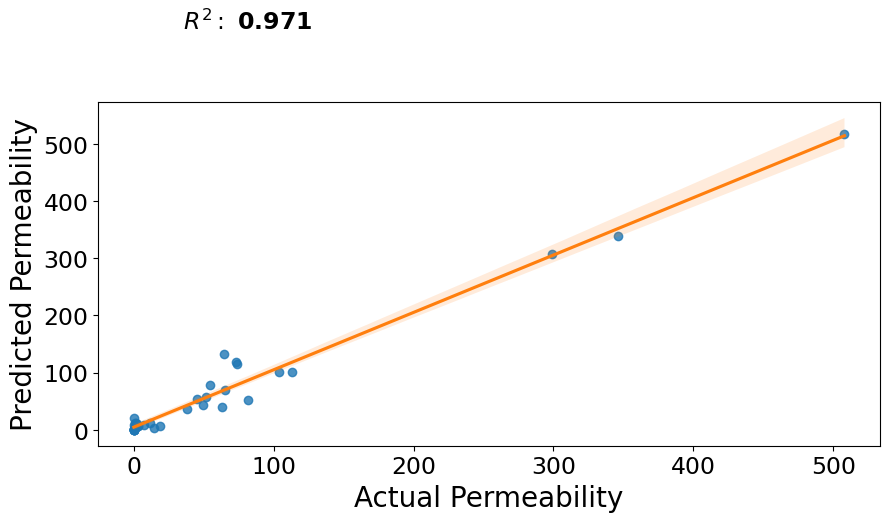

In [49]:
plt.figure(figsize=(9, 5.5))

sns.regplot(x=y_test, y=pred_2, scatter_kws={"color": "C0"}, line_kws={"color": "C1"})
plt.text(35, 700, "$R^2:$ {:.3f}".format(test_r2), fontsize=17,fontweight='bold')

plt.xlabel("Actual Permeability", fontsize=20)
plt.ylabel("Predicted Permeability", fontsize=20)
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)

plt.tight_layout()
plt.savefig("./output/gradient_boosting/regression_plot_gradient_boosting.png", dpi=300)
plt.show()

In [50]:
#from sklearn.externals import joblib
from joblib import dump, load
dump(regressor, './output/gradient_boosting/trained_gradient_boosting_model.joblib')

#clf = load('trained_linear_regression_model.joblib')

['./output/gradient_boosting/trained_gradient_boosting_model.joblib']

In [7]:
import numpy as np
import shap
from joblib import load
import matplotlib.pyplot as plt

# Load the pre-trained model
model = load('./output/gradient_boosting/trained_gradient_boosting_model.joblib')




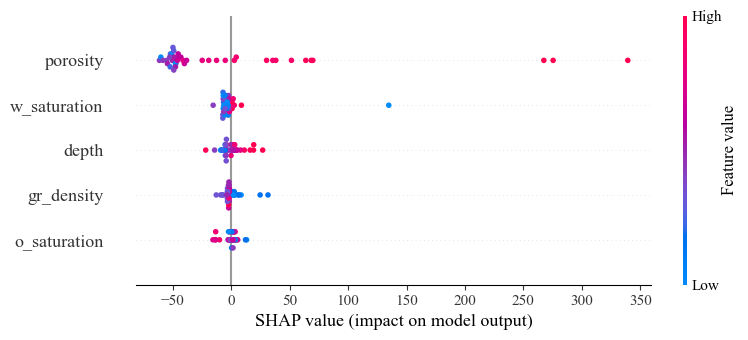

In [ ]:
import shap
import matplotlib.pyplot as plt
from joblib import load
labels = [ 'Depth', r'$\phi$', r'$\rho_{gr}$', r'$S_w$', r'$S_o$', 'K']
model = load('./output/gradient_boosting/trained_gradient_boosting_model.joblib')


explainer = shap.Explainer(model, X_test)


shap_values = explainer(X_test, check_additivity=False)


plt.rcParams['font.family'] = 'Times New Roman'

# Generate SHAP beeswarm plot
plt.figure(figsize=(13, 10))
shap.summary_plot(shap_values, X_test, plot_type="dot", show=False)

# Save the plot with 2000 DPI
plt.savefig('shap_beeswarm_plot.png', dpi=2000, bbox_inches='tight')

plt.show()


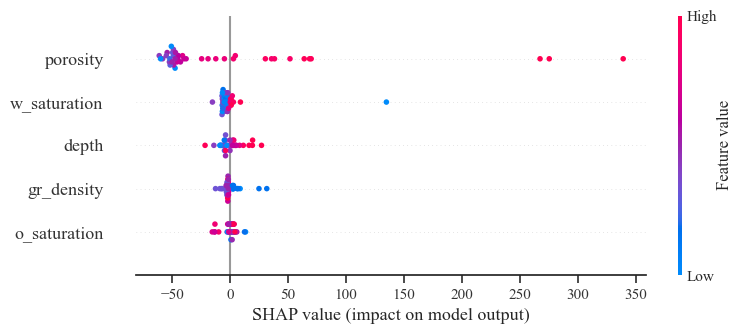

In [ ]:
import shap
import matplotlib.pyplot as plt
from joblib import load
import pandas as pd  # Import pandas


model = load('./output/gradient_boosting/trained_gradient_boosting_model.joblib')


explainer = shap.Explainer(model, X_test)


shap_values = explainer(X_test, check_additivity=False)

# Relabel the columns of X_test with the LaTeX labels
if isinstance(X_test, pd.DataFrame) and len(X_test.columns) == len(labels):
    X_test.columns = labels
else:
    print("Warning: X_test is not a DataFrame or the number of columns does not match the number of labels.  Labels will not be applied.")


plt.rcParams['font.family'] = 'Times New Roman'

# Generate SHAP beeswarm plot
plt.figure(figsize=(13, 10))
shap.summary_plot(shap_values, X_test, plot_type="dot", show=False)

# Save the plot with 2000 DPI
plt.savefig('shap_beeswarm_plot.png', dpi=2000, bbox_inches='tight')

plt.show()


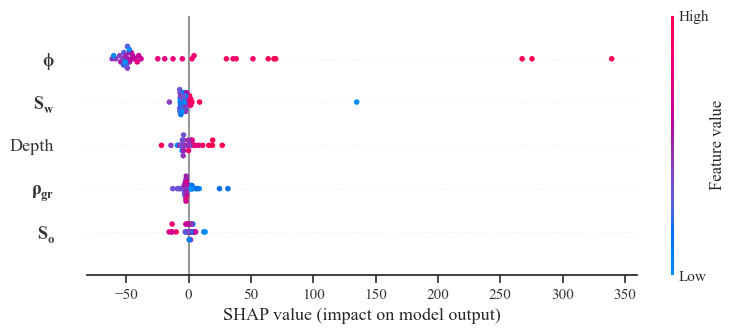

In [34]:
import shap
import matplotlib.pyplot as plt
from joblib import load
import pandas as pd  # Import pandas


model = load('./output/gradient_boosting/trained_gradient_boosting_model.joblib')


explainer = shap.Explainer(model, X_test)


shap_values = explainer(X_test, check_additivity=False)

# Define the labels *before* relabeling
labels = [ 'Depth', r'$\phi$', r'$\rho_{gr}$', r'$S_w$', r'$S_o$', 'K']  # Move labels definition here

# Relabel the columns of X_test with the LaTeX labels
if isinstance(X_test, pd.DataFrame) and len(X_test.columns) == len(labels):
    X_test.columns = labels
else:
    print("Warning: X_test is not a DataFrame or the number of columns does not match the number of labels.  Labels will not be applied.")


plt.rcParams['font.family'] = 'Times New Roman'

# Generate SHAP beeswarm plot
plt.figure(figsize=(13, 10))
shap.summary_plot(shap_values, X_test, plot_type="dot", show=False, feature_names=labels)  # Pass labels to feature_names

# Save the plot with 2000 DPI
plt.savefig('shap_beeswarm_plot.png', dpi=2000, bbox_inches='tight')

plt.show()
